
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [1]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


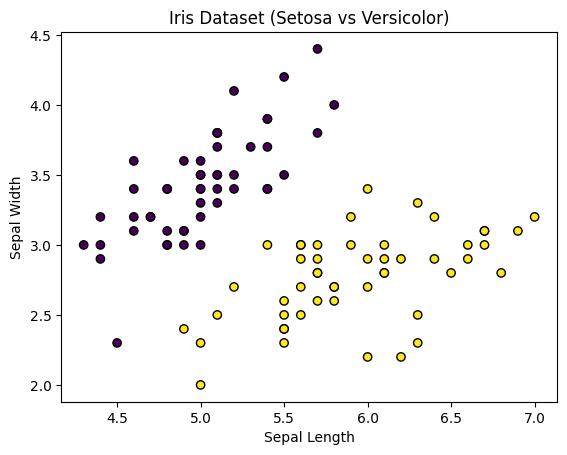

In [2]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [4]:
knc_model = KNeighborsClassifier(n_neighbors=2)
knc_model

KNeighborsClassifier(n_neighbors=2)

In [5]:
knc_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)


## Task 4: Predictions for Different Values of k


In [6]:
knc_y_pred = knc_model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred=knc_y_pred,y_true=y_test)

1.0


## Task 5: Decision Boundary Function (Provided)


In [8]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


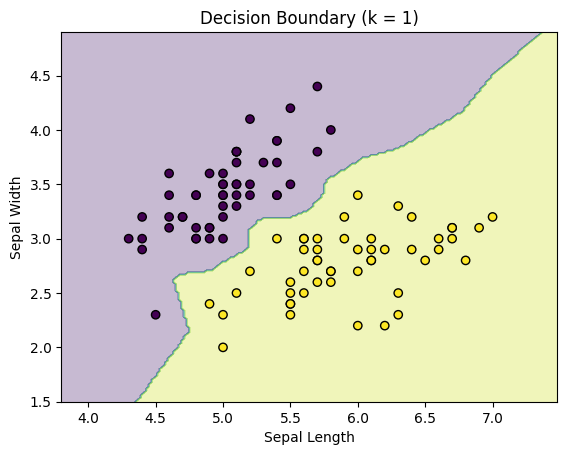

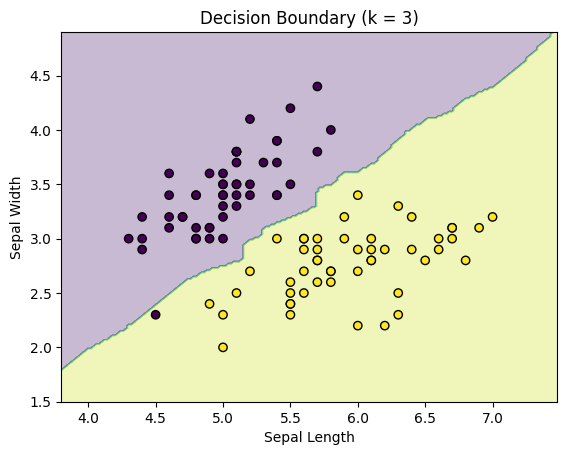

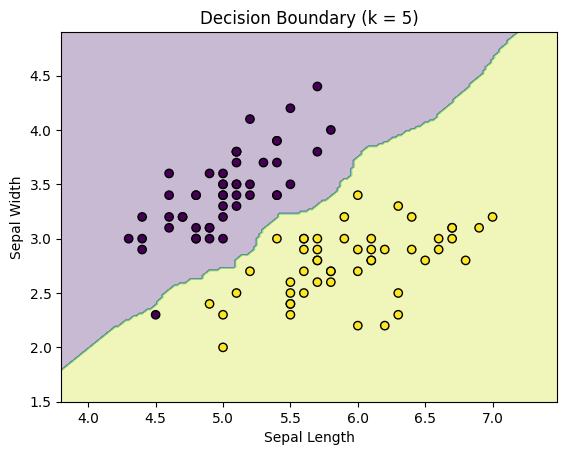

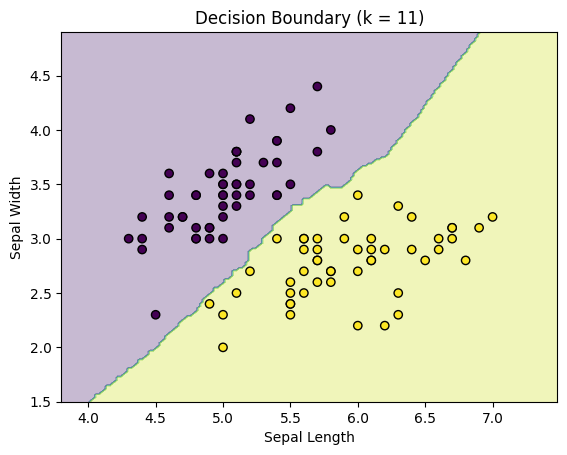

In [9]:

for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


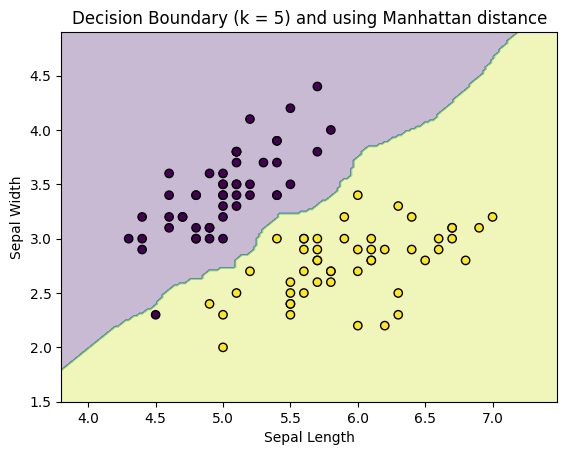

In [15]:
# Plot a decision boundary when using k=5 and change the distance
k = 5

model = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean') # Manhattan distance 
model.fit(X, y)
plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k}) and using Manhattan distance")

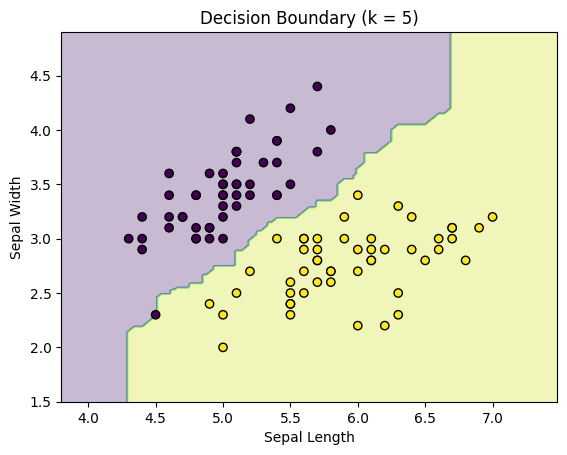

In [14]:
k = 5

model = KNeighborsClassifier(n_neighbors=k, metric='manhattan') # 
model.fit(X, y)
plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")


## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?
